# Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Load Raw Data

In [2]:
data_stats = pd.read_csv('stats_data.csv', encoding = "ISO-8859-1")
data_pop = pd.read_csv('popularity_data.csv', encoding = "ISO-8859-1")
data = pd.merge(data_stats, data_pop, on=['Player','Year'])

In [3]:
data.head()

,S,Year,Player,Allstar,Pos,Age,Tm,G,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 0,Unnamed: 0.1,Popularity
0,21679,2013,Quincy Acy,0,PF,22,TOR,29,0,342,...,77,11,13,15,17,53,116,1115,0,131.0
1,21680,2013,Jeff Adrien,0,PF,26,CHA,52,5,713,...,196,36,18,27,32,80,209,1575,0,240.0
2,21681,2013,Arron Afflalo,0,SF,27,ORL,64,64,2307,...,239,206,40,11,138,137,1057,1400,0,294.0
3,21686,2013,LaMarcus Aldridge,1,PF,27,POR,74,74,2790,...,670,192,62,91,143,187,1560,160,0,56.0
4,21687,2013,Lavoy Allen,0,C,23,PHI,79,37,1669,...,395,73,24,55,55,180,455,1460,0,153.0


In [4]:
data.describe()

,S,Year,Allstar,Age,G,GS,MP,PER,TS%,3PAr,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 0,Unnamed: 0.1,Popularity
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2702.000000,2695.000000,2695.000000,...,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000
mean,23213.571587,2015.052904,0.038846,26.628561,50.701443,23.814280,1169.380688,12.880496,0.517798,0.294040,...,204.166112,109.037736,37.568627,22.444321,66.756937,96.825009,490.093970,883.159083,2.052904,407.989271
std,859.580490,1.382110,0.193263,4.258447,25.089315,28.155582,841.695638,5.984366,0.082939,0.211162,...,190.158764,126.529781,33.266754,29.854256,60.006437,66.655878,443.987861,509.594949,1.382110,391.684666
min,21679.000000,2013.000000,0.000000,19.000000,1.000000,0.000000,0.000000,-41.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22475.500000,2014.000000,0.000000,23.000000,29.000000,1.000000,397.000000,10.000000,0.488000,0.106000,...,57.000000,23.500000,11.000000,4.000000,19.000000,38.000000,129.500000,444.500000,1.000000,127.500000
50%,23234.000000,2015.000000,0.000000,26.000000,56.000000,9.000000,1072.000000,12.900000,0.527000,0.299000,...,154.000000,66.000000,29.000000,12.000000,51.000000,93.000000,377.000000,885.000000,2.000000,316.000000
75%,23948.500000,2016.000000,0.000000,29.000000,74.000000,44.000000,1858.000000,15.900000,0.561000,0.446000,...,293.000000,144.000000,55.000000,29.000000,98.000000,146.000000,747.500000,1309.500000,3.000000,558.000000
max,24690.000000,2017.000000,1.000000,40.000000,83.000000,82.000000,3167.000000,129.100000,1.094000,1.000000,...,1226.000000,906.000000,191.000000,242.000000,464.000000,301.000000,2593.000000,1858.000000,4.000000,3358.000000


In [5]:
data.columns.tolist()

['S',
 'Year',
 'Player',
 'Allstar',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'Unnamed: 0',
 'Unnamed: 0.1',
 'Popularity']

## Clean Data

Remove artifacted columnns:

In [6]:
cols = data.columns.tolist()
cols = [x for x in cols if 'Unnamed' not in x]
data = data[cols]

In [7]:
def getBinaryClassInfo(dataframe, binary_feature):
    print('Initial Number of Samples: ', dataframe.shape[0])
    class_counts = dataframe[binary_feature].value_counts()
    class1_prop = class_counts[1]/class_counts[0]
    print('Percentage of All-Star Samples: ',  round(class1_prop*100, 2), '%')

In [8]:
getBinaryClassInfo(data, 'Allstar')

Initial Number of Samples:  2703
Percentage of All-Star Samples:  4.04 %


### Drop Duplicates

We'll remove all duplicate rows that correspond to the same player and season. In effect, this removes any sample that corresponds a season in which a given player was traded.

In [9]:
data_nodups = data.drop_duplicates(subset=['Year', 'Player'], keep=False)
getBinaryClassInfo(data_nodups, 'Allstar')
data = data_nodups

Initial Number of Samples:  1970
Percentage of All-Star Samples:  5.46 %


### Explore Missingness

In [10]:
def getMissingness(data):
    nan_counts = data.isnull().sum().tolist()
    features = data.columns.tolist()
    
    missingness = pd.DataFrame()
    missingness['features'] = pd.Series(features)
    missingness['nan_counts'] = pd.Series(nan_counts)
    missingness = missingness[missingness.nan_counts != 0]

    ax = sns.barplot(x=missingness.features, y=missingness.nan_counts)
    ax.set(xlabel='Features', ylabel='Missingness Count')
    plt.show()
    
    return missingness

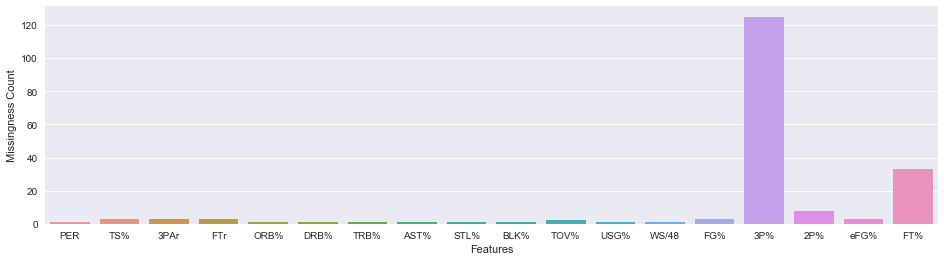

,features,nan_counts
10,PER,1
11,TS%,3
12,3PAr,3
13,FTr,3
14,ORB%,1
15,DRB%,1
16,TRB%,1
17,AST%,1
18,STL%,1
19,BLK%,1


In [11]:
plt.figure(figsize=(16,4))
getMissingness(data)

* It appears that **blank2** is a bogus feature that most samples are missing a value for, so we can confidently drop it from our dataset.

* Many samples are also missing a value for **3P%**. Since we think it might be a valuable feature down the road, we'll choose to sacrifice 14% of our dataset for now and discard every sample that does not contain a value for **3P%**. If later it seems that having the additional 1000 samples is necessary, we can use an imputation method to preserve them.

* The missingness of other features is so minimal that we will discard all correspinding samples.

Drop all rows with missingness (NaN values):

In [12]:
data = data.dropna()

getBinaryClassInfo(data, 'Allstar')

Initial Number of Samples:  1819
Percentage of All-Star Samples:  5.94 %


In [13]:
data.isnull().values.any()

False

Having dealt with duplicates and missingness, we are left around 6000 samples. 

## Make Dataset Numeric

In [14]:
def isNumericDataframe(data):
    non_numeric = []
    for col in data.columns.tolist():
        data_type = data[col].dtype
        if data_type == np.dtype('O'):
            return False
    return True

At this point we should get our dataset to a point where all of its elements contain numeric values. Our only non-numeric features are **Name**, **Pos** (position), and **Tm** (team). Name can be dropped, but we might be able to extract some value out of **Pos** and **Tm**.

In [15]:
data.to_csv('popularity_reference.csv')
data = data.drop('Player', axis=1)

Let's check out the distribution of values for these to features:

Text(0.5,1,'Positions')

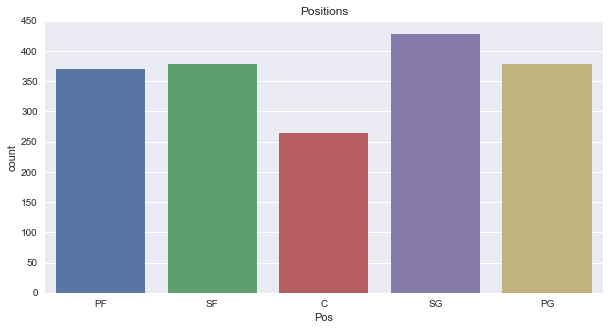

In [16]:
positions_dims = (10, 5)

fig, positions = plt.subplots(figsize=positions_dims)
sns.countplot(data['Pos'], ax=positions).set_title('Positions')

Text(0.5,1,'Teams')

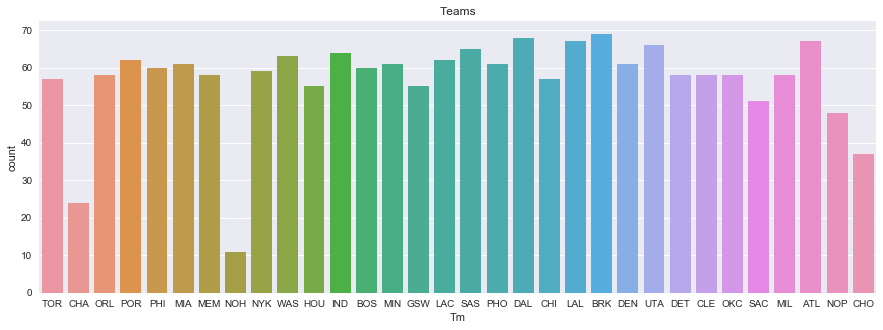

In [17]:
teams_dims = (15, 5)

fig, teams = plt.subplots(figsize=teams_dims)
sns.countplot(data['Tm'], ax=teams).set_title('Teams')

We can easily one-hot encode our data on positions. I'm not sure if this will provide much value, but we can make that determination later.

In [18]:
data = pd.concat([data, pd.get_dummies(data['Pos'])], axis=1)
data = data.drop('Pos', axis=1)

It doesn't seem like our team feature will do much for us. Some teams represented in our data either no longer exist or have changed their name, leaving us with an odd distribution. Also, over 3/4 of teams share a similar level of presence in our datase, so grouping probably isn't of much value. And since one-hot encoding all teams would increase our feature set by 50%, we are going to drop this feature.

In [19]:
data = data.drop('Tm', axis=1)

Our dataset is now completely numeric.

## Reduce Colinearity

So as of now, we have far too many features to work with. On top of this, many features seem to share a lot of colinearity. Now we'll use VIFs (variance inflation factor) to condense our feature set.

In [20]:
def calculateVIF(data):
    features = data.columns.tolist()
    vif_matrix = data.as_matrix()
    vif_scores = []
    for x in range(len(features)):
        vif_score = variance_inflation_factor(vif_matrix, x)
        vif_scores.append(vif_score)
        
    scores = pd.DataFrame()
    scores['features'] = pd.Series(features)
    scores['vif'] = pd.Series(vif_scores)
    scores = scores.sort_values('vif', ascending=False)
    
    return scores

In [21]:
def dropFeatures(data, features):
    data = data.drop(features, axis=1)
    vifs = calculateVIF(data)
    return data

Saving a dataset that does not have any features removed due to colinearity:

In [22]:
data.to_csv('full_data.csv')

Let's set aside our all-star feature for now:

In [23]:
allstar = data['Allstar']
data = data.drop('Allstar', axis=1)

Now we'll sequentially work through removing features based on their VIFs. We'll start out by reomoving ones with extremeley high scores and then use our discresion as our feature set gets smaller.

In [24]:
vifs = calculateVIF(data)
print(vifs.head(15))

/Users/Liam/anaconda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


   features           vif
27      FGA           inf
26       FG           inf
47      PTS           inf
41      TRB           inf
40      DRB           inf
39      ORB           inf
36       FT           inf
33      2PA           inf
32       2P           inf
30      3PA           inf
29       3P           inf
53       SG  1.299981e+07
51       PG  1.148134e+07
52       SF  1.148088e+07
50       PF  1.123751e+07


It looks like there is a lot of colinearity among many of the cumulative stats. Since there are equivalent propotional stats for most of these, we can drop them. Let's create a points-per-game (**PPG**) feature:

In [25]:
data['PPG'] = round(data['PTS']/data['G'], 2)

Dropping features with 15 highest VIFs:

In [26]:
dropping = vifs['features'].tolist()[:15]
data = dropFeatures(data, dropping)
vifs = calculateVIF(data)
print(vifs.head(15))

   features          vif
26      FG%  9117.464680
29     eFG%  8725.103272
12     TRB%  7961.501976
20       WS  7626.981182
24      BPM  6021.216190
11     DRB%  4321.640844
22     OBPM  3802.573765
18      OWS  3038.357820
7       TS%  2885.651648
1      Year  1484.426065
23     DBPM  1460.646542
19      DWS  1412.670678
0         S   990.978350
10     ORB%   640.293185
6       PER   610.647457


Deleteing next 15 features with highest VIFs:

In [27]:
dropping = vifs['features'].tolist()[:15]
data = dropFeatures(data, dropping)
vifs = calculateVIF(data)
print(vifs)

      features         vif
3           MP  126.145698
1            G   74.174177
10        USG%   70.109435
23         PPG   60.038498
14         2P%   58.228565
20         TOV   46.989141
16         FT%   41.676776
0          Age   34.293167
17         AST   30.885338
18         STL   23.521153
6         AST%   22.452701
15         FTA   21.851764
9         TOV%   21.794262
7         STL%   13.277715
11       WS/48   10.752274
19         BLK   10.486582
8         BLK%   10.143900
5          FTr    9.228143
2           GS    8.969298
13         3P%    8.044585
4         3PAr    6.882310
12        VORP    6.453968
22           C    2.145474
21  Popularity    2.012913


Designate a dataset with a little over 20 features:

In [28]:
data_big = data
data_big.shape

(1819, 24)

Dropping features with 15 highest VIFs:

In [29]:
dropping = vifs['features'].tolist()[:15]
data = dropFeatures(data, dropping)
vifs = calculateVIF(data)
print(vifs)

     features       vif
6         BLK  6.724193
3        BLK%  6.634335
5         3P%  5.958649
1        3PAr  4.218827
0          GS  3.859462
2         FTr  3.543945
4        VORP  2.313375
8           C  1.972792
7  Popularity  1.845300


In [30]:
dropping = ['BLK', '3PAr']
data = dropFeatures(data, dropping)
vifs = calculateVIF(data)
print(vifs)

     features       vif
1         FTr  3.518045
2        BLK%  3.211651
0          GS  3.132656
4         3P%  2.853770
3        VORP  2.177163
6           C  1.927407
5  Popularity  1.812672


Designate a dataset with 7 features, all of which have VIFs < 5:

In [31]:
data_small = data
data_small.shape

(1819, 7)

We've cut out a ton of colinearity from our original dataset and are left with two seperate datasets at this point:

* **data_big** contains 24 features, many of which have VIFs above 5
* **data_small** contains 7 features, all of which have VIFs above 5

At this poin, we're not sure if more features with more colinearity or less features with less colinearity will serve us better. We'll test both out later and see what works best.

As a final step before exporting our dataset, lets move our **Allstar** feature back:

In [32]:
data_big['Allstar'] = allstar
data_small['Allstar'] = allstar

In [33]:
data_big.to_csv('data_big.csv')
data_small.to_csv('data_small.csv')